### Librerías y conexión a Refinitiv

In [5]:
import eikon as ek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta 

plt.style.use('dark_background');

In [6]:
ek.set_app_key('')

## Rendimiento S&P500

In [7]:
f_inicio = '2023-09-25' # inicio de portafolio
f_final = '2023-11-24' # fecha final

In [8]:
# precio de cierre del índice S&P500
dax = ek.get_data('SPY',['TR.CLOSE.Date','TR.CLOSE'],
                  {'SDate':str(f_inicio),'EDate':str(f_final),'Frq':'D'})[0].rename(columns={"Price Close": "Cierre"})

dax.Date = pd.to_datetime(dax.Date)
dax = dax.set_index('Date').tz_localize(None).drop('Instrument', axis=1)

In [9]:
# obtener rendimiento 
dax['Cierre']= np.log(dax['Cierre'].div(dax['Cierre'].shift(1)))
rSP = dax.dropna()
rSP.head()

,Cierre
Date,
2023-09-26,-0.0148
2023-09-27,0.000399
2023-09-28,0.005781
2023-09-29,-0.00243
2023-10-02,-0.000398


## Trackers

In [10]:
def rend_portafolio(trackers, total):
    dinero = []
    rendimiento = []
    for i in range(len(trackers)):
        t = trackers[i]['Current Value (USD) [PT_CURRENT_VALUE_BC]'].iloc[-1]
        dinero.append(t)

        
    for i in range(len(dinero)):
        r = ((dinero[i]-total)/total)*100
        rendimiento.append(r)
        
    return rendimiento

In [11]:
t1 = pd.read_csv('MDDCapital.csv')
t2 = pd.read_csv('MDDCapital2.csv')
t3 = pd.read_csv('MDDCapital3.csv')
t4 = pd.read_csv('MDDCapital.csv')
t5 = pd.read_csv('MDDCapital5.csv')
t6 = pd.read_csv('MDDCapital6.csv')
t7 = pd.read_csv('MDDCapital7.csv')
t8 = pd.read_csv('MDDCapital8.csv')
t9 = pd.read_csv('MDDCapital9.csv')

trackers = [t1,t2,t3,t4,t5,t6,t7,t8,t9]

In [12]:
rP = rend_portafolio(trackers, 1000000)
rP[3] = 0.8015290000000038

In [13]:
fechas = ['2023-10-03', '2023-10-10', '2023-10-17','2023-10-23','2023-10-30', '2023-11-03','2023-11-15', '2023-11-22', '2023-11-24']
fechas = pd.to_datetime(pd.Series(fechas))

# Comparativa

## Entre índice y portafolio

In [14]:
df = rSP[rSP.index.isin(fechas)]
df

,Cierre
Date,
2023-10-03,-0.013476
2023-10-10,0.005191
2023-10-17,-0.000046
2023-10-23,-0.001735
2023-10-30,0.011885
2023-11-03,0.009082
2023-11-15,0.002115
2023-11-22,0.003853
2023-11-24,0.000615


In [15]:
def mostrar_rend(x, y, delta, alin, wr, rot):
    plt.text(x, y+delta, str(round(y,5)), size='small', weight='bold', ha=alin, rotation=10+rot, color= wr)

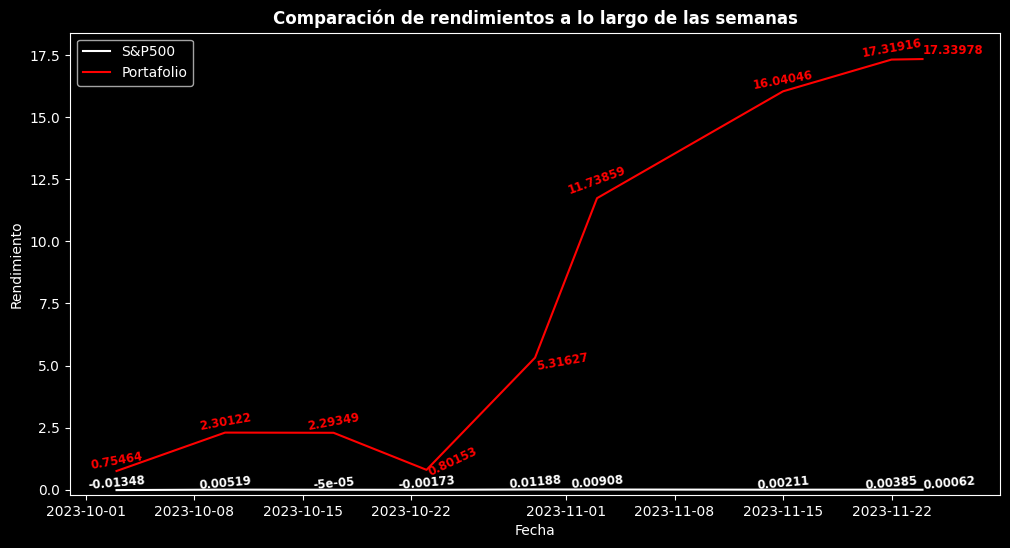

In [16]:
fig = plt.figure(figsize=(12, 6));
plt.title('Comparación de rendimientos a lo largo de las semanas', weight='bold')

plt.plot(df, 'white', label='S&P500');
for i in range(len(df.Cierre)):
    if i!=(len(df.Cierre)-1):
        mostrar_rend(df.index[i],df.Cierre[i],0.05,'center','white',-5)
    else:
        mostrar_rend(df.index[i],df.Cierre[i],0.05,'left','white',-5)

plt.plot(fechas,rP, 'red', label='Portafolio');
for i in range(len(rP)):
    if i==4:
        mostrar_rend(fechas[i],rP[i],-0.5,'left','red',0)
    elif i==3:
        mostrar_rend(fechas[i],rP[i],-0.25,'left','red',15)
    elif i==5:
        mostrar_rend(fechas[i],rP[i],+0.2,'center','red',10)
    elif i==(len(rP)-1):
        mostrar_rend(fechas[i],rP[i],+0.2,'left','red',-10)
    else:
        mostrar_rend(fechas[i],rP[i],+0.1,'center','red',0)

plt.legend(loc='upper left');
plt.ylim(-0.2,18.4);
plt.xlim(fechas[0]-timedelta(3), fechas[8]+timedelta(5))
plt.xlabel('Fecha');
plt.ylabel('Rendimiento');

In [19]:
# segunda mitad del portafolio
rP2 = rP[5:]
fechas2 = fechas[5:]

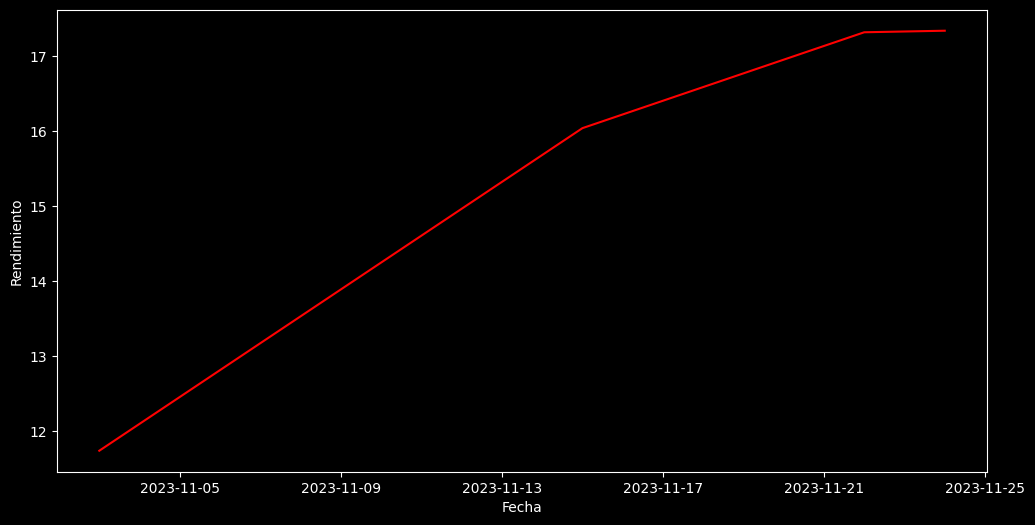

In [18]:
fig = plt.figure(figsize=(12, 6));

plt.plot(fechas2,rP2,'red');
plt.xlabel('Fecha');
plt.ylabel('Rendimiento');

## Entre portafolio inicial y actual

In [20]:
p_inicial = ['2454.TW', 'CMCSA.O', 'COST.O', 'FANG.OQ', 'MA',
                'META.O', 'MSFT.O', 'NVDA.OQ', 'PG', 'SHEL.AS']

w_inicial = [0.075121, 0.047017, 0.173064, 0.061061, 0.136672,
                0.062806, 0.054751, 0.183630, 0.094316, 0.111563]

In [28]:
df_IN = ek.get_timeseries(p_inicial, start_date = f_inicio, end_date = f_final, fields=['CLOSE'], interval="daily")
df_IN.head()

CLOSE,2454.TW,CMCSA.O,COST.O,FANG.OQ,MA,META.O,MSFT.O,NVDA.OQ,PG,SHEL.AS
Date,,,,,,,,,,
2023-09-25,755,44.87,558.62,152.64,402.49,300.83,317.54,422.22,150.66,30.435
2023-09-26,737,44.24,552.96,153.06,395.38,298.96,312.14,419.11,149.32,30.335
2023-09-27,737,44.6,563.53,157.23,395.48,297.74,312.79,424.68,147.34,30.78
2023-09-28,735,44.86,568.63,157.14,399.44,303.96,313.64,430.89,146.34,31.15
2023-09-29,<NA>,44.34,564.96,154.88,395.91,300.21,315.75,434.99,145.86,30.505


In [29]:
df_rend = np.log(df_IN/df_IN.shift(1))

df_rend*=w_inicial
df_rend = df_rend.dropna()
df_rend['REND'] = df_rend.sum(axis=1)

df2 = df_rend[df_rend.index.isin(fechas)]

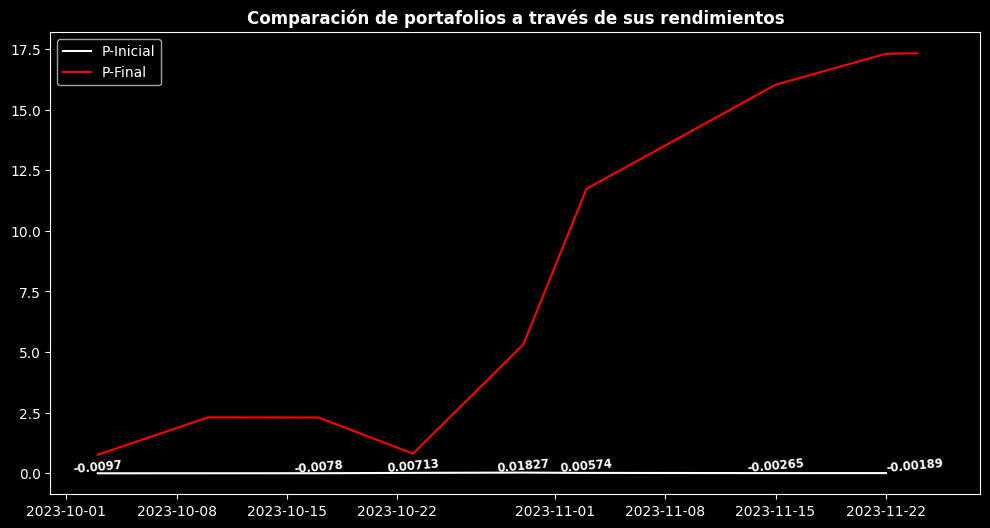

In [30]:
fig = plt.figure(figsize=(12, 6));
plt.title('Comparación de portafolios a través de sus rendimientos', weight='bold')

plt.plot(df2.REND, 'white', label='P-Inicial');

for i in range(len(df2.REND)):
    if i!=(len(df2.REND)-1):
        mostrar_rend(df2.index[i],df2.REND[i],0.05,'center','white',-5)
    else:
        mostrar_rend(df2.index[i],df2.REND[i],0.05,'left','white',-5)

plt.plot(fechas,rP, 'red', label='P-Final');

plt.legend();
plt.xlim(fechas[0]-timedelta(3), fechas[8]+timedelta(4));

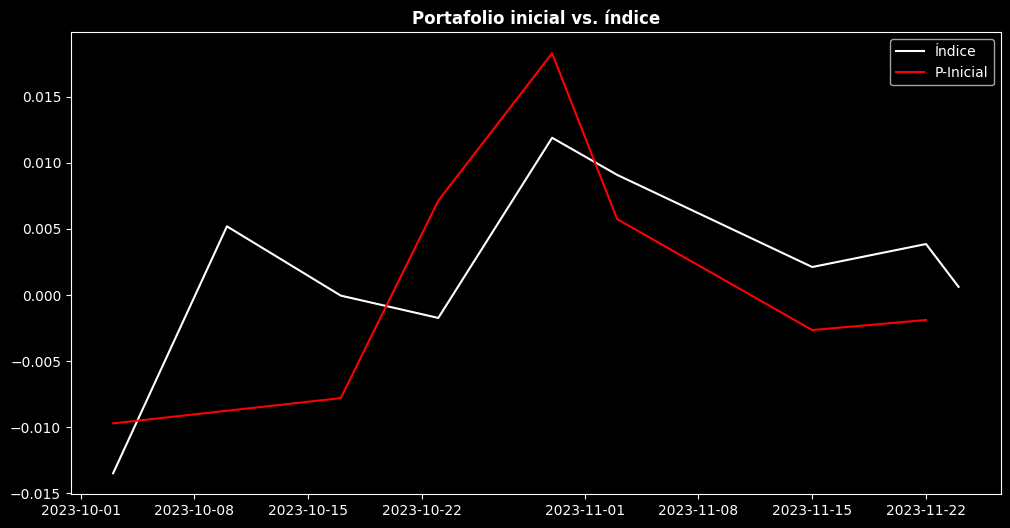

In [31]:
fig = plt.figure(figsize=(12, 6));
plt.title('Portafolio inicial vs. índice', weight='bold')

plt.plot(df.Cierre, 'white', label='Índice');
plt.plot(df2.REND, 'red', label='P-Inicial');

plt.legend();